# Regression

Regression modeling is any attempt to predict or explain a continous variable from a collection of input data. This could be student GPA, the position of a planet orbiting a sun, or the color of a pixel in a photo. Values such as whether a student is a STEM student or not, the probability of an event occuring (such as changing a major, an earthquake) are not regression tasks (they are classification).

After completing this tutorial you should be able to:

* use `sci-kit learn` to split data into training and testing sets
* understand the model, fit, score paradigm in `sci-kit learn` and apply it to a problem
* understand the most important visualizations of regression analysis: actual vs. predicted, actual vs. residuals, residuals distribution vs. assumed theoretical distribution (in case of OLS models)
* have a conceptual understanding of the basic goal of any regression task
* have some understanding that most statistical "tests" are typically just specific solutions of a linear regression problem
* have some understanding of the assumptions of linear models

## Further reading

1. Hands on machine learning, probably the best practical machine learning textbook ever written https://github.com/ageron/handson-ml
2. Common statistical tests are linear models, stop thinking statistics are something other than y=mx+b, they are not. lol. https://lindeloev.github.io/tests-as-linear/?fbclid=IwAR09Rp4Vv18fOO4lg0ITnCYJICCC1iuzeq-tNYPWsnmK6CrGgdErpvHfyWE

## Data

Here is a file named [`regression_data.csv`](data/regression_data.csv). Import the data like you did in the previous tutorial "exploring data". The first step in any regression task is to explore the data the raw data.

# 1. Import the data

We will first need to import the data. To do so, we need to first import the relevant libraries that are necessary to import and visualize the data. Then, we can import the data into a dataframe for analysis. 

1. First import the ``pandas``, ``numpy``, and ``matplotlib.pyplot`` libraries
2. Then, import the data into a data frame using the ``read_csv()`` method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/regression_data.csv')
df.head()

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity,fci_post
0,2.083621,51.137226,48.929495,1.0,2.642089,2.0,14.618734
1,2.043927,47.819398,31.298644,1.0,1.872415,2.0,10.652295
2,2.147087,34.160519,32.312813,0.0,2.068908,2.0,7.546426
3,2.286152,55.850494,43.496181,0.0,2.058815,2.0,14.041647
4,2.519186,77.501019,39.407797,0.0,1.932764,2.0,15.960932


# 2. Investigate the correlations

Now that we have the data imported, you can see there's 7 variables for each student record. We are attempting to see what factors are connected with ``fci_post`` as we want to try to predict a measure of conceptual understanding. To do that it would be useful to see how each variable to correlates with the ``fci_post`` score. 

We can do this in a couple ways. 
1. We can use ``pandas`` method ``corr`` to see the correlation coefficients. [[How to use corr]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
2. We can use ``pandas`` plotting library to visualize the correlations. [[How to use scatter_matrix]](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

### Questions
Once you complete these correlational analysis, answer these questions.

1. Which variables most strongly correlate with ``fci_post``?
2. Is there any conflict between the information gained from ``corr`` and ``scatter_matrix``? That is, does one provide better information about correlations?
3. Which variables might you expect to appear predictive in a model?

In [3]:
df.corr()

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity,fci_post
cGPA,1.000000,-0.379050,0.098558,-0.000698,0.014864,-0.006504,0.429689
attendance,-0.379050,1.000000,0.198594,-0.017965,-0.014733,-0.024063,0.369330
passed_percent,0.098558,0.198594,1.000000,0.023502,0.021640,-0.020883,0.568117
sex,-0.000698,-0.017965,0.023502,1.000000,0.026238,-0.021709,-0.004709
hsGPA,0.014864,-0.014733,0.021640,0.026238,1.000000,-0.035986,0.010453
ethnicity,-0.006504,-0.024063,-0.020883,-0.021709,-0.035986,1.000000,-0.029876
fci_post,0.429689,0.369330,0.568117,-0.004709,0.010453,-0.029876,1.000000


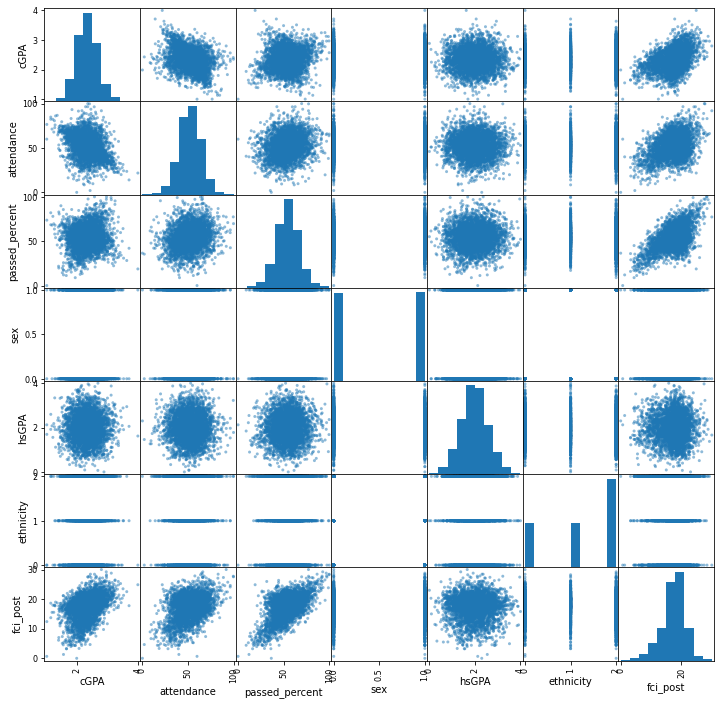

In [4]:
from pandas.plotting._misc import scatter_matrix
axes=scatter_matrix(df, figsize=(12,12))

# 3. Modeling

Modeling data is as much an art as it is science. There is no "true" model, there is only a model that reduces error to an acceptable amount. Most models attempt to do this automatically by minimizing some sort of cost function (or error) using some kind of solver algorithm. These solving methods are beyond the scope of this workshop but are important to know they exist and somewhat how they work. If you are interested in this sort of thing I recommend starting with [this stats exchange thread](https://stats.stackexchange.com/questions/160179/do-we-need-gradient-descent-to-find-the-coefficients-of-a-linear-regression-mode) and googling each solver in the answer that seems interesting. This is only for Linear Least Squares models but its a good place to start. 

For this analysis, we will use the paradigm that we discussed where we split the data into a training set the develop the model and then use the model to predict the outcomes of a test set. 

<img src="https://raw.githubusercontent.com/learningmachineslab/tutorials/master/docs/slides/figures/ml_process.png" width=800 />

## 3.1 Splitting the data

We first need to split the data into a training set and a test set. To do this, we will also need to know which variable we intend to predict. The library ``sklearn`` has builtin methods for doing this splitting, so we will also need to import it. Notice that you can import a library any time that you need to.

1. Import ``train_test_split`` from ``sklearn.model_selection``. 
2. Look at your data and determine which columns will be the input features of your model and which will be the predicted variable. You might find using ``columns`` useful. [[Return column labels]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)
3. Split the data into training and testing data sets using the `sklearn.model_selection` method `train_test_split` [[How to use train_test_split]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Questions

1. How large is the training data set?
2. How can you change the amount of data used in the training set? [[How to use train_test_split]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df.columns

Index(['cGPA', 'attendance', 'passed_percent', 'sex', 'hsGPA', 'ethnicity',
       'fci_post'],
      dtype='object')

In [7]:
features = ['cGPA','attendance','passed_percent', 'sex', 'hsGPA', 'ethnicity']
output = ['fci_post']
df[features]

,cGPA,attendance,passed_percent,sex,hsGPA,ethnicity
0,2.083621,51.137226,48.929495,1.0,2.642089,2.0
1,2.043927,47.819398,31.298644,1.0,1.872415,2.0
2,2.147087,34.160519,32.312813,0.0,2.068908,2.0
3,2.286152,55.850494,43.496181,0.0,2.058815,2.0
4,2.519186,77.501019,39.407797,0.0,1.932764,2.0
...,...,...,...,...,...,...
3995,2.067698,52.941889,65.051548,1.0,2.107277,2.0
3996,2.449005,63.282221,54.918656,0.0,2.205480,0.0
3997,2.227918,52.155313,52.040404,1.0,1.679202,0.0
3998,2.341053,46.928807,62.977916,0.0,2.468935,1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[output])

## 3.2 Creating and scoring the model

Now that we have split the data into training and test sets, we can build a model of the training set. We will focus first on a linear model using an ordinary least squares (OLS) fit. This is likely a model that you are familiar with, particularly for lines of best fit between two measurements. The general approach is to construct a linear model for student records that minimizes the error using OLS. to do this we need to import the ``LinearRegression`` method from ``sklearn.linear_model``, then create a model, fit it, and score it. *Notice: this approach to using linear regression with sci-kit learn is quite similar across other regression methods.*

1. Import the ``LinearRegression`` method from ``sklearn.linear_model`` [[How to use LinearRegression]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
2. Create an OLS model and fit it.
3. Score the model using your model's built in `score` method. 


### Questions

1. What does score represent? What is it summarizing? [[The score method]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
2. Are we justified in using a linear model? [[Read about assumptions of linear models]](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [11]:
LR.score(X_test,y_test)

0.7046531187010654

# 4. Analysing the model output

Now that we have established the goal of the model is to minimize the error, created a model, and found a score for the model, we still must recognize that the model has some error. The error/residual is really just the linear distance from the model "plane" to the predicted value as shown below:

<img src="https://miro.medium.com/max/860/1*40E7lY7o39jddXBKQypeTA.png"/>

These residuals are data in their own right. But instead of being data about students, courses, etc. they are data about the model and how it is giving predictions. Thus we can use them to describe the model performance.

## 4.1 Predicting from test data

We will start by investigating how well our model, constructed from the training set, predicts the scores from test set.
 
1. Create predicted data using the model's `predict` method. 
2. Make a scatter plot to compare it to the actual values and draw a diagonal through this plot. 

### Questions

1. What "shape" does the scatter plot "blob" look like? 
2. Does the "blob" follow the diagonal line or does it deviate in some way?
3. Can you tell if the model over or under predicts scores in the test set?

In [12]:
predicted = LR.predict(X_test)

Text(0.5, 0, 'Actual FCI Score')

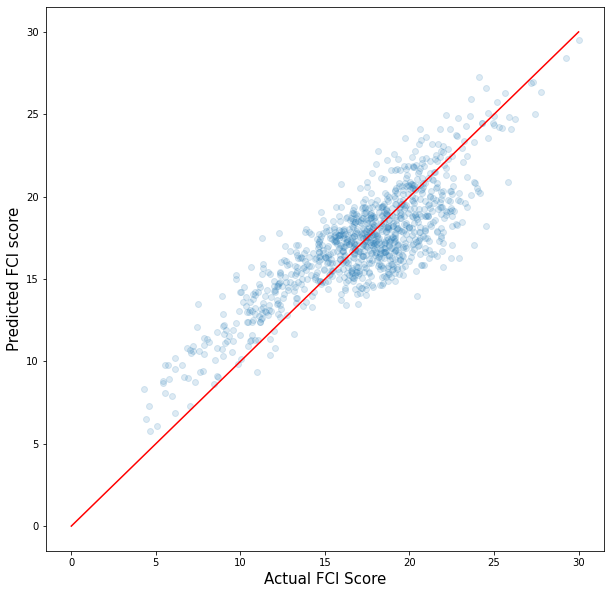

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x=y_test, y=predicted, alpha=0.15)
ax.plot([-0, 30], [-0, 30], color='red')
ax.set_ylabel('Predicted FCI score', fontsize=15)
ax.set_xlabel('Actual FCI Score', fontsize=15)

## 4.2 Inspecting the residuals of the model

One of the major assumptions of a linear model is that error is normall distributed. Basically, we aim for the error in the model to be distributed equally around zero, so that there's little [heteroscedasticity](https://statisticsbyjim.com/regression/heteroscedasticity-regression/). If a linear model has errors that are not normally dsitributed, we are might be in a little be of trouble with regard to believing the model, and we might have to try another modeling approach. One way to look into this is to compute and plot the residuals. They should be roughly normally distributed if we are justfied in using a linear model. This analysis will tell us if our model tends to overpredict or underpredict scores and for which scores it does so.


1. Write a function to calculate the residuals of the model. 
2. Plot the actual values versus the residuals using a scatter plot. (*This is the most common way of seeing a residual analysis in practice.*)
3. Collapse the residual scatter plot into a histogram. (*This is a useful visualization to see the normality of the distribution*) [[How to plot a histogram]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

### Questions

1. Do we appear to be justified in using a linear model?
2. Does the model tend to overpredict or underpredict certain groups of scores?

In [14]:
def calculate_residuals(actual, predicted):
    return predicted - actual

residuals = calculate_residuals(actual=y_test, predicted=predicted)

Text(0.5, 0, 'Actual')

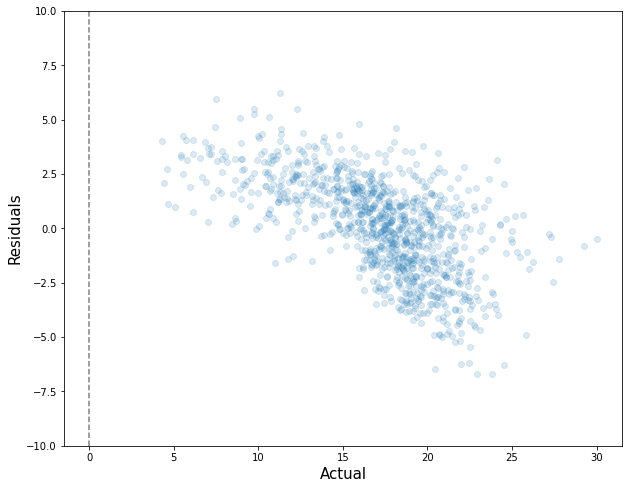

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(x=y_test, y=residuals, alpha=0.15)
ax.plot([0, 0], [-10, 10], color='black', linestyle='--', alpha=0.5)
ax.set_ylim(-10, 10)

ax.set_ylabel('Residuals', fontsize=15)
ax.set_xlabel('Actual', fontsize=15)

Text(0, 0.5, 'Counts')

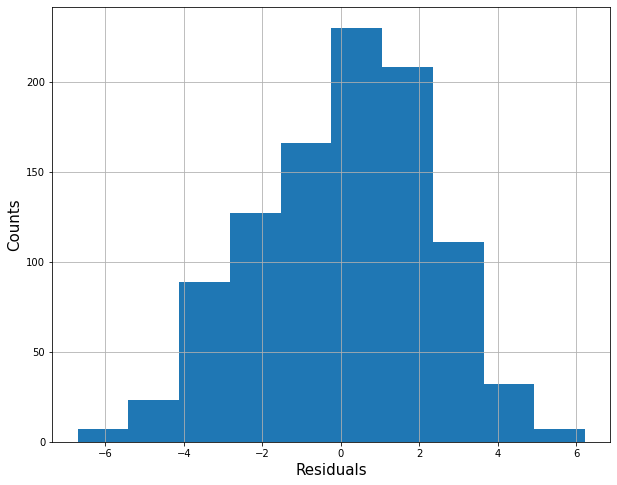

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

residuals['fci_post'].hist()

ax.set_xlabel('Residuals', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

# 5. Model Features - training and fitting

All models have some input data X and some output prediction Y. The input data X is of the shape $m \times n$, so that means there are $m$ columns (or features) and $n$ data "points" (or vectors if $m>1$). For many models, you can return values from the model that give some indication as to how "important" each particular feature is to the model's training. Typically, the larger the magnitude of this value, the more important the feature is for prediction. This value for linear models is called the model *coefficients*. It may also be called *feature importance*. These values are always calculated from the data that was used to train (fit) the model. Thus, they don't really tell us about how important the features are for new data, rather how important the features were in deciding the "shape" of the model itself.

## Finding fit coefficients

For our linear model, the coefficients are related to the correlation between each input varaiable and the output prediction. Earlier you looked at the correlations between each input variable and the output variable. Now, we return the linear fit coefficients and plots them to see which features are most "important" to our model. ``LinearRegression`` has a builtin attribute ``coef_`` that returns these fit coefficients.

1. Return the fit coefficients using ``coef_``
2. Make a bar graph of all the features in the model. [[How to make a horizontal bar plot]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)


### Questions 
1. Which is the most important feature for fitting? 
2. Which is least important?

In [17]:
model_coefficients = LR.coef_
coefs_df = pd.DataFrame(model_coefficients.T, index=df.columns[0:-1], columns=['coef',])
coefs_df

,coef
cGPA,6.464318
attendance,0.158036
passed_percent,0.122683
sex,-0.000406
hsGPA,-0.025611
ethnicity,0.006312


<AxesSubplot:>

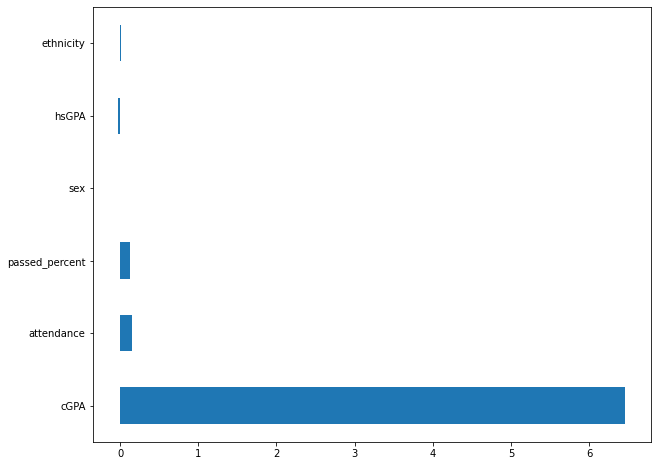

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
coefs_df['coef'].plot.barh()

# 6. Model Features - predicting

The correlary to each feature's coefficient or importance value, is the amount of variance that feature explains in the prediction. Remember, we have split the data into two separate sets, the training data and the testing data. The test data is never shown to the model until after the model is "fit" to the training data. This secrecy is why we are able to test the predictive power of each model. This secret or "hold out" data can be used to measure the "explained variance" of each coefficient/feature. One method of doing this is called [recursive feature elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html). Essentially, the coefficient of the model are ordered by magnitude, and the smallest are then removed one at a time until only one feature is left. Each iteration the model's `score` function is called. This provides a ranking based on the predictive power of the features.

## Finding the explained variance

1. Import ``RFECV`` from ``sklearn.feature_selection``.
2. Using the `RFE` function, calculate the explained variance of each of the features in your model using ``grid_scores_``. [[How to use RFE]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
3. Plot the scores returned for each of the combination of features from largest contributions to smallest as a line plot.

### Questions

1. What fraction of the variance is explained by the whole model?
2. Which input features explain the most variance?
3. Which explain the least and could be dropped in order to find a parsimonious model?

In [19]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator=LinearRegression(), )
rfe.fit(X_train, y_train)

RFECV(estimator=LinearRegression())

In [20]:
rfe.grid_scores_

/Users/caballero/opt/anaconda3/envs/JupyterBook/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.19936427, 0.12559834, 0.18560106, 0.19755517, 0.18403771],
       [0.43707905, 0.46730567, 0.54265626, 0.56245376, 0.50648166],
       [0.61288776, 0.62110108, 0.67339007, 0.6985336 , 0.65850214],
       [0.61284535, 0.62009386, 0.67312415, 0.69830163, 0.65847098],
       [0.61283675, 0.62001393, 0.67274528, 0.69809628, 0.65843964],
       [0.6128228 , 0.61994015, 0.67273617, 0.69809436, 0.65842934]])

Text(0, 0.5, 'R-squared')

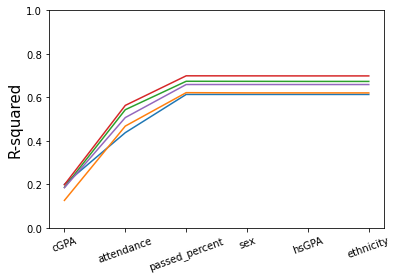

In [21]:
fig, ax = plt.subplots()

ax.plot(rfe.grid_scores_)
ax.set_ylim(0, 1)

ax.set_xticks(np.arange(len(df.columns[:-1])))
ax.set_xticklabels(df.columns[:-1], rotation=20)
ax.set_ylabel('R-squared', fontsize=15)

## 7. Other regressors

We used a linear model, but we could easily subsitute another regressor. Let try an algorithm called "Random Forest". This algorithm has the ability to weight the features relative to each other. Let's explore the residuals and the feature importances of the Random Forest algorithm.

1. Import the ``RandomForestRegressor`` method from ``sklearn.ensemble`` [[How to use RandomForestRegressor]](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)
2. Using your train dataset, create your Random Forest model and fit it. 

## 7.1 Creating the model

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train, y_train)

/var/folders/5_/9z7lhk0s2y95hvkzs6lzdvvc0000gn/T/ipykernel_85689/3759250952.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

## 7.2 Predicting from test data

Just like for the OLS model above, we will start by investigating how well our model, constructed from the training set, predicts the scores from test set.
 
1. Create predicted data using the model's `predict` method. 
3. Score the accuracy of your model by calculating the `mean_squared_error` between the predictions from your fit model and your test dataset outcomes.
2. Make a scatter plot to compare it to the actual values and draw a diagonal through this plot. 

### Questions

1. What does the root mean squared error tell us? How does it compare to the `score` from the OLS model above? 
2. What "shape" does the scatter plot "blob" look like? How does it compare to the Linear Regression plot we made above?
3. Does the "blob" follow the diagonal line or does it deviate in some way?
4. Can you tell if the model over or under predicts scores in the test set?

In [24]:
predicted = RF.predict(X_test)
## Unfortunately the 'predict' function for RandomForestRegressor is in a different shape than the predict function for LinearRegression
## We need to reshape this array in order to calculate the errors
predicted = np.reshape(predicted,(1000,1)) 

In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

print('Average fci_post score:', df['fci_post'].mean())

Mean Absolute Error: 1.5442726715355475
Mean Squared Error: 4.0386074599325195
Root Mean Squared Error: 2.009628687079412
Average fci_post score: 17.347833832521747


With 1000 trees, the root mean squared error is 2.01 which is greater than 10 percent of the average fci_post score i.e. 1.73. This may indicate, among other things, that we have not used enough estimators (trees). Computational power issue??

Text(0.5, 0, 'Actual FCI Score')

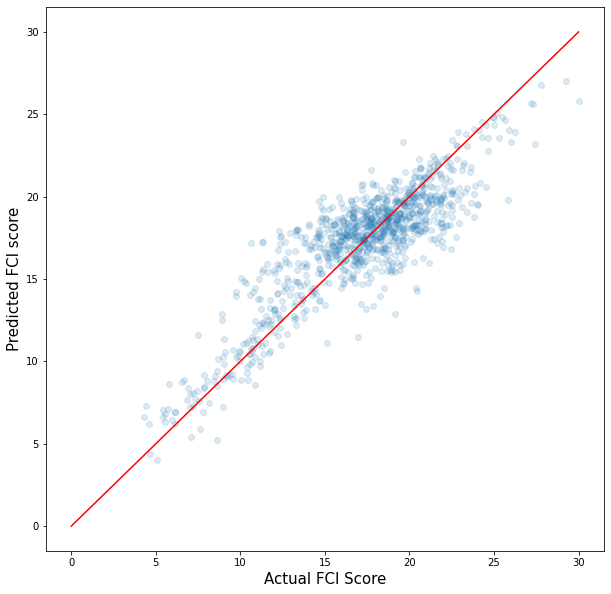

In [26]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x=y_test, y=predicted, alpha=0.15)
ax.plot([-0, 30], [-0, 30], color='red')
ax.set_ylabel('Predicted FCI score', fontsize=15)
ax.set_xlabel('Actual FCI Score', fontsize=15)

## 7.3 Inspecting the residuals of the model

1. Write a function to calculate the residuals of the model. 
2. Plot the actual values versus the residuals using a scatter plot. (*This is the most common way of seeing a residual analysis in practice.*)
3. Collapse the residual scatter plot into a histogram. (*This is a useful visualization to see the normality of the distribution*) [[How to plot a histogram]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

### Questions

1. How does this plot compare to the plot we produced for Linear Regression?
2. Does the model tend to overpredict or underpredict certain groups of scores?

In [27]:
residuals = calculate_residuals(actual=y_test, predicted=predicted)

Text(0.5, 0, 'Actual')

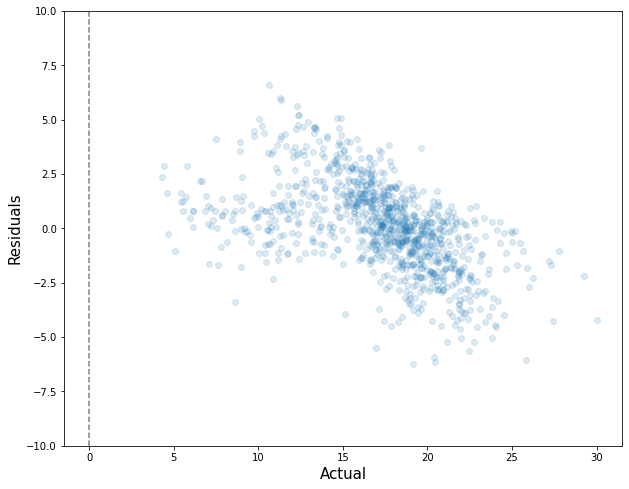

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(x=y_test, y=residuals, alpha=0.15)
ax.plot([0, 0], [-10, 10], color='black', linestyle='--', alpha=0.5)
ax.set_ylim(-10, 10)

ax.set_ylabel('Residuals', fontsize=15)
ax.set_xlabel('Actual', fontsize=15)

Text(0, 0.5, 'Counts')

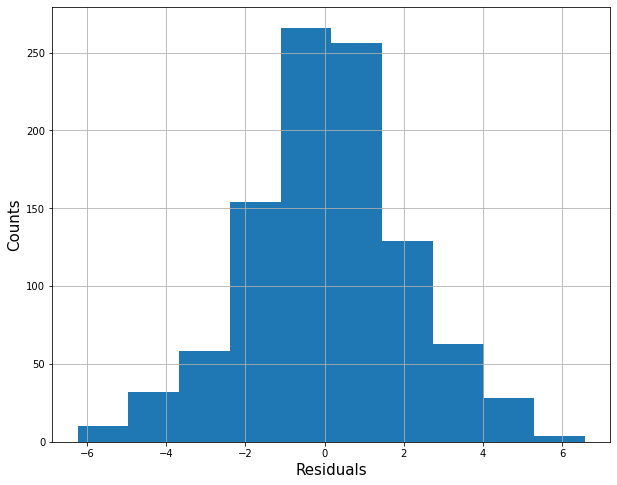

In [29]:
fig, ax = plt.subplots(figsize=(10,8))

residuals['fci_post'].hist()

ax.set_xlabel('Residuals', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)

## 7.4 Finding feature importances

For our linear model above, the coefficients are related to the correlation between each input varaiable and the output prediction. Earlier you looked at the correlations between each input variable and the output variable. The Random Forest algorithm feature importances says that in a given model these features are most important in explaining the target variable. These importances are relative to each of the other features in your model.

1. Return the fit importances using ``feature_importances_``
2. Make a bar graph of all the features in the model. [[How to make a horizontal bar plot]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html)


### Questions 
1. Which is the most important feature for fitting? 
2. Which is least important?
3. How do this compare to the coefficients we analyzed in OLS model above?

In [30]:
model_importances = RF.feature_importances_
import_df = pd.DataFrame(model_importances.T, index=df.columns[0:-1], columns=['importances',])
import_df

,importances
cGPA,0.290367
attendance,0.273757
passed_percent,0.367543
sex,0.007015
hsGPA,0.050031
ethnicity,0.011286


<AxesSubplot:>

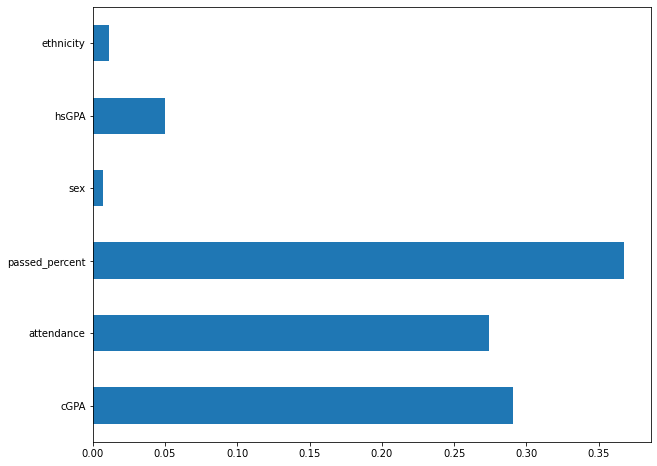

In [31]:
fig, ax = plt.subplots(figsize=(10,8))

import_df['importances'].plot.barh()